In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'gender_submission.csv', 'test.csv']


In [2]:
import pandas as pd
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [6]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

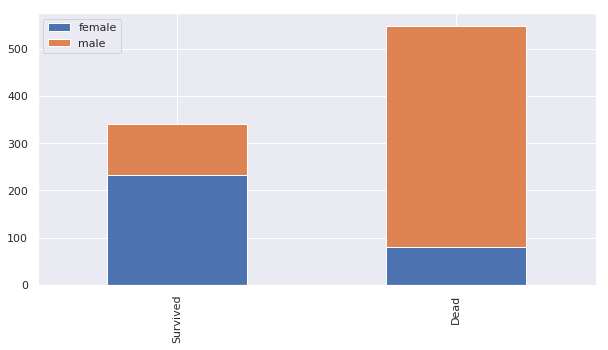

In [7]:
bar_chart('Sex')

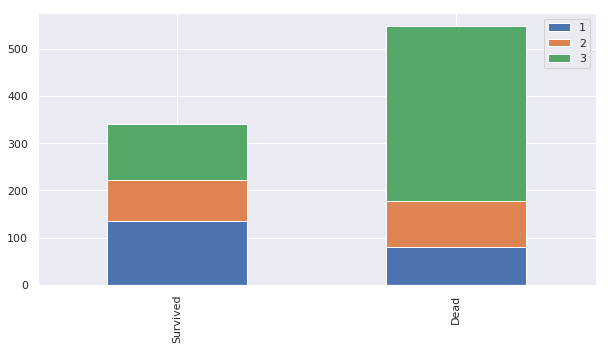

In [8]:
bar_chart('Pclass')

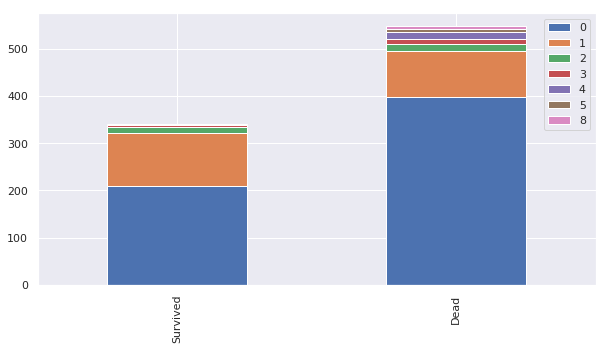

In [9]:
bar_chart('SibSp')

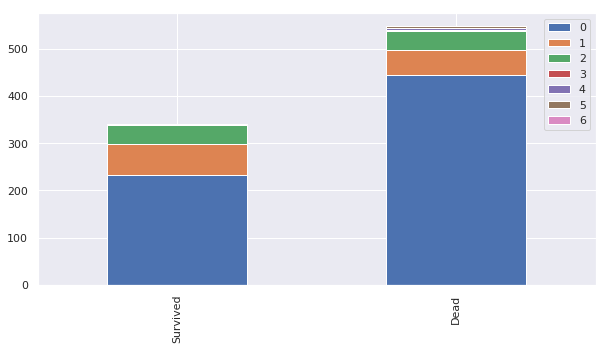

In [10]:
bar_chart('Parch')

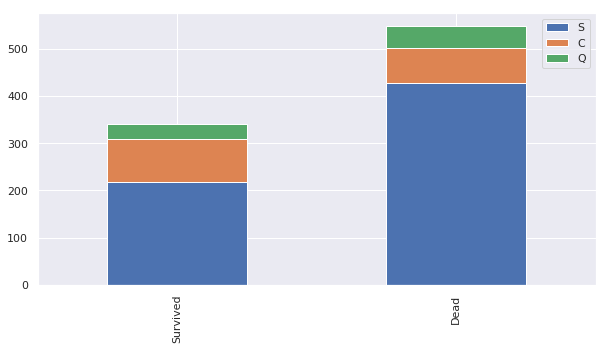

In [11]:
bar_chart('Embarked')

In [12]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Anderson, Mr. Harry",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [13]:
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [15]:
southampton = train[train["Embarked"] == "S"].shape[0]
print("S : ",southampton)
cherbourg = train[train["Embarked"] == "C"].shape[0]
print("C : ",cherbourg)
queenstown = train[train["Embarked"] == "Q"].shape[0]
print("Q : ",queenstown)

S :  644
C :  168
Q :  77


In [16]:
train = train.fillna({"Embarked": "S"})

In [17]:
embarked_mapping = {"S" :1, "C" :2, "Q" : 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1


In [18]:
combine = [train, test]

for dataset in combine :
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [19]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col', 
                                                 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [20]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1,1


In [21]:
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)
combine = [train, test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,1,1
1,1,1,female,38.0,1,0,71.2833,2,3
2,1,3,female,26.0,0,0,7.9250,1,2
3,1,1,female,35.0,1,0,53.1000,1,3
4,0,3,male,35.0,0,0,8.0500,1,1


In [22]:
sex_mapping = {"male" : 0, "female" : 1}
for dataset in combine :
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,1,1
1,1,1,1,38.0,1,0,71.2833,2,3
2,1,3,1,26.0,0,0,7.9250,1,2
3,1,1,1,35.0,1,0,53.1000,1,3
4,0,3,0,35.0,0,0,8.0500,1,1


In [23]:
train['Age'] = train['Age'].fillna(-0.5)
test['Age'] = test['Age'].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,0,22.0,1,0,7.2500,1,1,Student
1,1,1,1,38.0,1,0,71.2833,2,3,Adult
2,1,3,1,26.0,0,0,7.9250,1,2,Young Adult
3,1,1,1,35.0,1,0,53.1000,1,3,Young Adult
4,0,3,0,35.0,0,0,8.0500,1,1,Young Adult


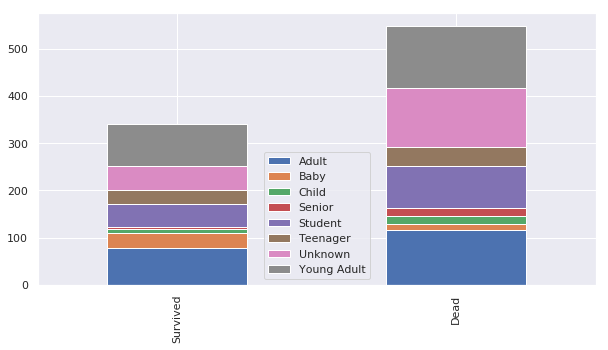

In [24]:
bar_chart('AgeGroup')

In [25]:
age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]
               
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,0,22.0,1,0,7.2500,1,1,Student
1,1,1,1,38.0,1,0,71.2833,2,3,Adult
2,1,3,1,26.0,0,0,7.9250,1,2,Young Adult
3,1,1,1,35.0,1,0,53.1000,1,3,Young Adult
4,0,3,0,35.0,0,0,8.0500,1,1,Young Adult


In [26]:
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train = train.drop(['Age'], axis=1)
test = test.drop(['Age'], axis=1)

train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,0,1,0,7.2500,1,1,4
1,1,1,1,1,0,71.2833,2,3,6
2,1,3,1,0,0,7.9250,1,2,5
3,1,1,1,1,0,53.1000,1,3,5
4,0,3,0,0,0,8.0500,1,1,5


In [27]:
print(train[['Pclass', 'Fare']].groupby(['Pclass'], as_index=False).mean())
print("")
print(test[test["Fare"].isnull()]["Pclass"])

   Pclass       Fare
0       1  84.154687
1       2  20.662183
2       3  13.675550

152    3
Name: Pclass, dtype: int64


In [28]:
test['Fare'] = test['Fare'].fillna(13.67555)
print(test['Fare'][151])
print(test['Fare'][152])
print(test['Fare'][153])

7.8958
13.67555
12.1833


In [29]:
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

train = train.drop(['Fare'], axis=1)
test = test.drop(['Fare'], axis=1)

train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeGroup,FareBand
0,0,3,0,1,0,1,1,4,1
1,1,1,1,1,0,2,3,6,4
2,1,3,1,0,0,1,2,5,2
3,1,1,1,1,0,1,3,5,4
4,0,3,0,0,0,1,1,5,2


In [30]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']
test_data = test.drop("PassengerId", axis=1).copy()

train_data.shape, target.shape

((891, 8), (891,))

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    891 non-null int64
Title       891 non-null int64
AgeGroup    891 non-null int64
FareBand    891 non-null category
dtypes: category(1), int64(8)
memory usage: 56.8 KB


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
clf = RandomForestClassifier(n_estimators=13)
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=13, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.84269663 0.7752809  0.82022472 0.83146067 0.85393258
 0.83146067 0.80898876 0.79775281 0.85393258]


In [34]:
round(np.mean(score)*100, 2)

82.16

In [35]:
clf.fit(train_data, target)
prediction = clf.predict(test_data)
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
